In [9]:
print('''
Peak hours, seasonality trends. 

Areas to interrogate: 
- How has the distribution of rideable types changed over time? 
- When did e-bikes get added to the system? 
- Is there a correlation between day of the week and ride length? bike type and day of the week or hours of the day? 
- Is there a correlation between day of the week and bike type? 
- Station imbalance: Which stations consistently run empty or full?
- Bike redistribution needs: Where do bikes accumulate vs where they're needed?
- Peak capacity stress: Which stations/times show highest demand relative to supply?
- Rush hour vs leisure patterns: Different station pairs popular at different times?
- Weekend vs weekday geographic preferences
- Holiday/event impact on usage patterns
''')


Peak hours, seasonality trends. 

Areas to interrogate: 
- How has the distribution of rideable types changed over time? 
- When did e-bikes get added to the system? 
- Is there a correlation between day of the week and ride length? bike type and day of the week or hours of the day? 
- Is there a correlation between day of the week and bike type? 
- Station imbalance: Which stations consistently run empty or full?
- Bike redistribution needs: Where do bikes accumulate vs where they're needed?
- Peak capacity stress: Which stations/times show highest demand relative to supply?
- Rush hour vs leisure patterns: Different station pairs popular at different times?
- Weekend vs weekday geographic preferences
- Holiday/event impact on usage patterns



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# plotting-- for future use
plt.style.use('default')
sns.set_palette("husl")

# loading
df = pd.read_parquet('../data/processed/cleaned_citibike_data_with_features.parquet')

# check for correct load
print(f"Data shape: {df.shape}")
print(df.head())

Data shape: (3209060, 17)
            ride_id  rideable_type              started_at  \
0  F561526822C9D60B  electric_bike 2024-04-27 13:56:13.940   
1  359BAF91507F4998  electric_bike 2024-04-25 15:23:14.529   
2  AAEE95A1C0106C97  electric_bike 2024-04-06 11:15:18.132   
3  95B077C9C619D404  electric_bike 2024-04-06 16:19:25.749   
4  1A33C864454C4692  electric_bike 2024-04-10 17:40:14.700   

                 ended_at             start_station_name start_station_id  \
0 2024-04-27 14:05:23.629            FDR Drive & E 35 St          6230.04   
1 2024-04-25 15:27:52.895          Forsyth St & Grand St          5382.07   
2 2024-04-06 11:22:10.081                E 20 St & 2 Ave          5971.08   
3 2024-04-06 16:21:43.098  Eastern Pkwy & Washington Ave          3928.08   
4 2024-04-10 17:48:11.571                W 27 St & 6 Ave          6215.07   

                          end_station_name end_station_id  start_lat  \
0                          E 10 St & 2 Ave        5746.02  40.7439

In [6]:
column_names = df.columns.tolist()

# Print the list of column names
print(column_names)

['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'hour', 'day_of_week', 'duration_minutes']


In [10]:
print('''
Descriptive statistics + distribution analysis. 
Correlation + association analysis. 
''')


Descriptive statistics + distribution analysis. 
Correlation + association analysis. 



In [22]:
def analyze_bike_relationships(df):
    """
    Analyze elationships between day_of_week, hour, duration_minutes, rideable_type.
    """
    
    # 1. DESCRIPTIVE STATISTICS
    print("=== DESCRIPTIVE STATISTICS ===")
    print("\nRideable Type Distribution:")
    rideable_counts = df['rideable_type'].value_counts()
    rideable_percentages = df['rideable_type'].value_counts(normalize=True) * 100
    rideable_distribution = pd.DataFrame({
        'Count': rideable_counts,
        'Percentage': rideable_percentages.round(2)
    })
    print(rideable_distribution)
    
    print("\nDay of Week Distribution:")
    day_of_week_counts = df['day_of_week'].value_counts()
    day_of_week_percentages = df['day_of_week'].value_counts(normalize=True) * 100
    day_of_week_distribution = pd.DataFrame({
        'Count': day_of_week_counts,
        'Percentage': day_of_week_percentages.round(2)
    })
    print(day_of_week_distribution)
    
    print("\nDuration Statistics:")
    duration_stats = df['duration_minutes'].describe()
    for stat, value in duration_stats.items():
        print(f"{stat:>8}: {value:>12,.2f}")
    
    print("\nHour Statistics:")
    hour_stats = df['hour'].describe()
    for stat, value in hour_stats.items():
        print(f"{stat:>8}: {value:>8.2f}")
    
    # 2. CORRELATION ANALYSIS
    print("\n=== CORRELATION ANALYSIS ===")
    numeric_vars = ['hour', 'duration_minutes']
    correlation_matrix = df[numeric_vars].corr()
    print("\nCorrelation between Hour and Duration:")
    print(correlation_matrix)
    
    # 3. CHI-SQUARE TESTS FOR CATEGORICAL ASSOCIATIONS
    print("\n=== CATEGORICAL ASSOCIATIONS ===")
    
    # Day of week vs Rideable type
    contingency_day_rideable = pd.crosstab(df['day_of_week'], df['rideable_type'])
    chi2_day_rideable, p_day_rideable, dof, expected = chi2_contingency(contingency_day_rideable)
    
    print(f"\nDay of Week vs Rideable Type:")
    print(f"Chi-square: {chi2_day_rideable:.4f}")
    print(f"P-value: {p_day_rideable:.4f}")
    print(f"Association: {'Significant' if p_day_rideable < 0.05 else 'Not significant'}")
    

In [25]:
print('''
TO DO:
- rideable type by time of day correlation
- expand on correlation between hour and duration
- correlation between hour and day of week 
- volume of member vs non?
''')

# run function
analyze_bike_relationships(df)




TO DO:
- rideable type by time of day correlation
- expand on correlation between hour and duration
- correlation between hour and day of week 
- volume of member vs non?

=== DESCRIPTIVE STATISTICS ===

Rideable Type Distribution:
                 Count  Percentage
rideable_type                     
electric_bike  2100577       65.46
classic_bike   1108483       34.54

Day of Week Distribution:
              Count  Percentage
day_of_week                    
Monday       574877       17.91
Tuesday      556583       17.34
Friday       440700       13.73
Saturday     434246       13.53
Sunday       432738       13.48
Thursday     388157       12.10
Wednesday    381759       11.90

Duration Statistics:
   count: 3,209,060.00
    mean:        13.01
     std:        20.72
     min:         1.00
     25%:         5.17
     50%:         8.97
     75%:        15.72
     max:     1,494.62

Hour Statistics:
   count: 3209060.00
    mean:    14.10
     std:     4.90
     min:     0.00
     25%: 

In [44]:
def create_relationship_visualizations(df):
    """
    Create comprehensive visualizations showing relationships between variables
    """
    
    # Create a large figure with multiple subplots
    fig = plt.figure(figsize=(20, 30))
    
    # 1. Heatmap: Average ride duration by day and hour
    plt.subplot(5, 2, 1)
    pivot_duration = df.groupby(['day_of_week', 'hour'])['duration_minutes'].mean().unstack()
    sns.heatmap(pivot_duration, cmap='YlOrRd', cbar_kws={'label': 'Avg Duration (min)'})
    plt.title('Average Ride Duration by Day and Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    
    # 2. Box plot: Duration by rideable type and day of week
    plt.subplot(5, 2, 2)
    sns.boxplot(data=df, x='day_of_week', y='duration_minutes', hue='rideable_type', 
                fill=True, palette='Set2')
    plt.title('Ride Duration by Day of Week and Rideable Type')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 3. Line plot: Average duration by hour for each rideable type
    plt.subplot(5, 2, 3)
    hourly_avg = df.groupby(['hour', 'rideable_type'])['duration_minutes'].mean().unstack()
    overall_avg = df['duration_minutes'].mean()
    
    for col in hourly_avg.columns:
        plt.plot(hourly_avg.index, hourly_avg[col], marker='o', label=col, linewidth=2)
    
    # Add overall average line
    plt.axhline(y=overall_avg, color='black', linestyle='--', alpha=0.7, 
                label=f'Overall Avg ({overall_avg:.1f} min)')
    
    plt.title('Average Duration by Hour and Rideable Type')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Duration (minutes)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Stacked bar: Rideable type distribution by day
    plt.subplot(5, 2, 4)
    rideable_day = pd.crosstab(df['day_of_week'], df['rideable_type'], normalize='index') * 100
    overall_rideable_pct = df['rideable_type'].value_counts(normalize=True) * 100
    
    rideable_day.plot(kind='bar', stacked=True, ax=plt.gca())
    
    # Add average lines for each rideable type
    ax = plt.gca()
    for i, rideable_type in enumerate(rideable_day.columns):
        avg_pct = overall_rideable_pct[rideable_type]
        ax.axhline(y=avg_pct, color=f'C{i}', linestyle='--', alpha=0.7, 
                   label=f'{rideable_type} Avg ({avg_pct:.1f}%)')
    
    plt.title('Rideable Type Distribution by Day (%) with Averages')
    plt.xlabel('Day of Week')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 5. Violin plot: Duration distribution by day of week
    plt.subplot(5, 2, 5)
    sns.violinplot(data=df, x='day_of_week', y='duration_minutes')
    plt.title('Duration Distribution by Day of Week')
    plt.xticks(rotation=45)
    plt.ylabel('Duration (minutes)')
    
    # 6. Heatmap: Ride count by day and hour
    plt.subplot(5, 2, 6)
    pivot_count = df.groupby(['day_of_week', 'hour']).size().unstack()
    sns.heatmap(pivot_count, cmap='Blues', cbar_kws={'label': 'Ride Count'})
    plt.title('Ride Count by Day and Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    
    # 7. Scatter plot with trend: Hour vs Duration colored by rideable type
    plt.subplot(5, 2, 7)
    for rideable in df['rideable_type'].unique():
        subset = df[df['rideable_type'] == rideable]
        # Sample data if too large for performance
        if len(subset) > 5000:
            subset = subset.sample(5000)
        plt.scatter(subset['hour'], subset['duration_minutes'], 
                   alpha=0.6, label=rideable, s=20)
    plt.title('Hour vs Duration by Rideable Type')
    plt.xlabel('Hour of Day')
    plt.ylabel('Duration (minutes)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 8. Bar plot: Average duration by rideable type for each day
    plt.subplot(5, 2, 8)
    avg_duration_day_rideable = df.groupby(['day_of_week', 'rideable_type'])['duration_minutes'].mean().unstack()
    avg_duration_day_rideable.plot(kind='bar', ax=plt.gca())
    plt.title('Average Duration by Day and Rideable Type')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Duration (minutes)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set Y-axis to show every minute
    ax = plt.gca()
    y_min, y_max = ax.get_ylim()
    ax.set_yticks(range(int(y_min), int(y_max) + 2, 1))
    
    # 9. Multi-line plot: Hourly ride patterns by day of week
    plt.subplot(5, 2, 9)
    hourly_patterns = df.groupby(['hour', 'day_of_week']).size().unstack()
    for day in hourly_patterns.columns:
        plt.plot(hourly_patterns.index, hourly_patterns[day], 
                marker='o', label=day, linewidth=2)
    plt.title('Hourly Ride Patterns by Day of Week')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Rides')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


TO DO:
- remove outliers for "ride duration by DOW and rideable type" to improve clarity
- remove outliers for "duration by DOW" to improve clarity
- evaluate what's happening with outliers 
    - hypothesize around the outliers & proof 
- ride duration by start/end position
- ride duration + DOW by start/end position
- look at 'duration by day and hour' and 'count by day and hour' -- interrogate
- curiosity: I expect ride duration for ebikes to be shorter because they can go faster. 



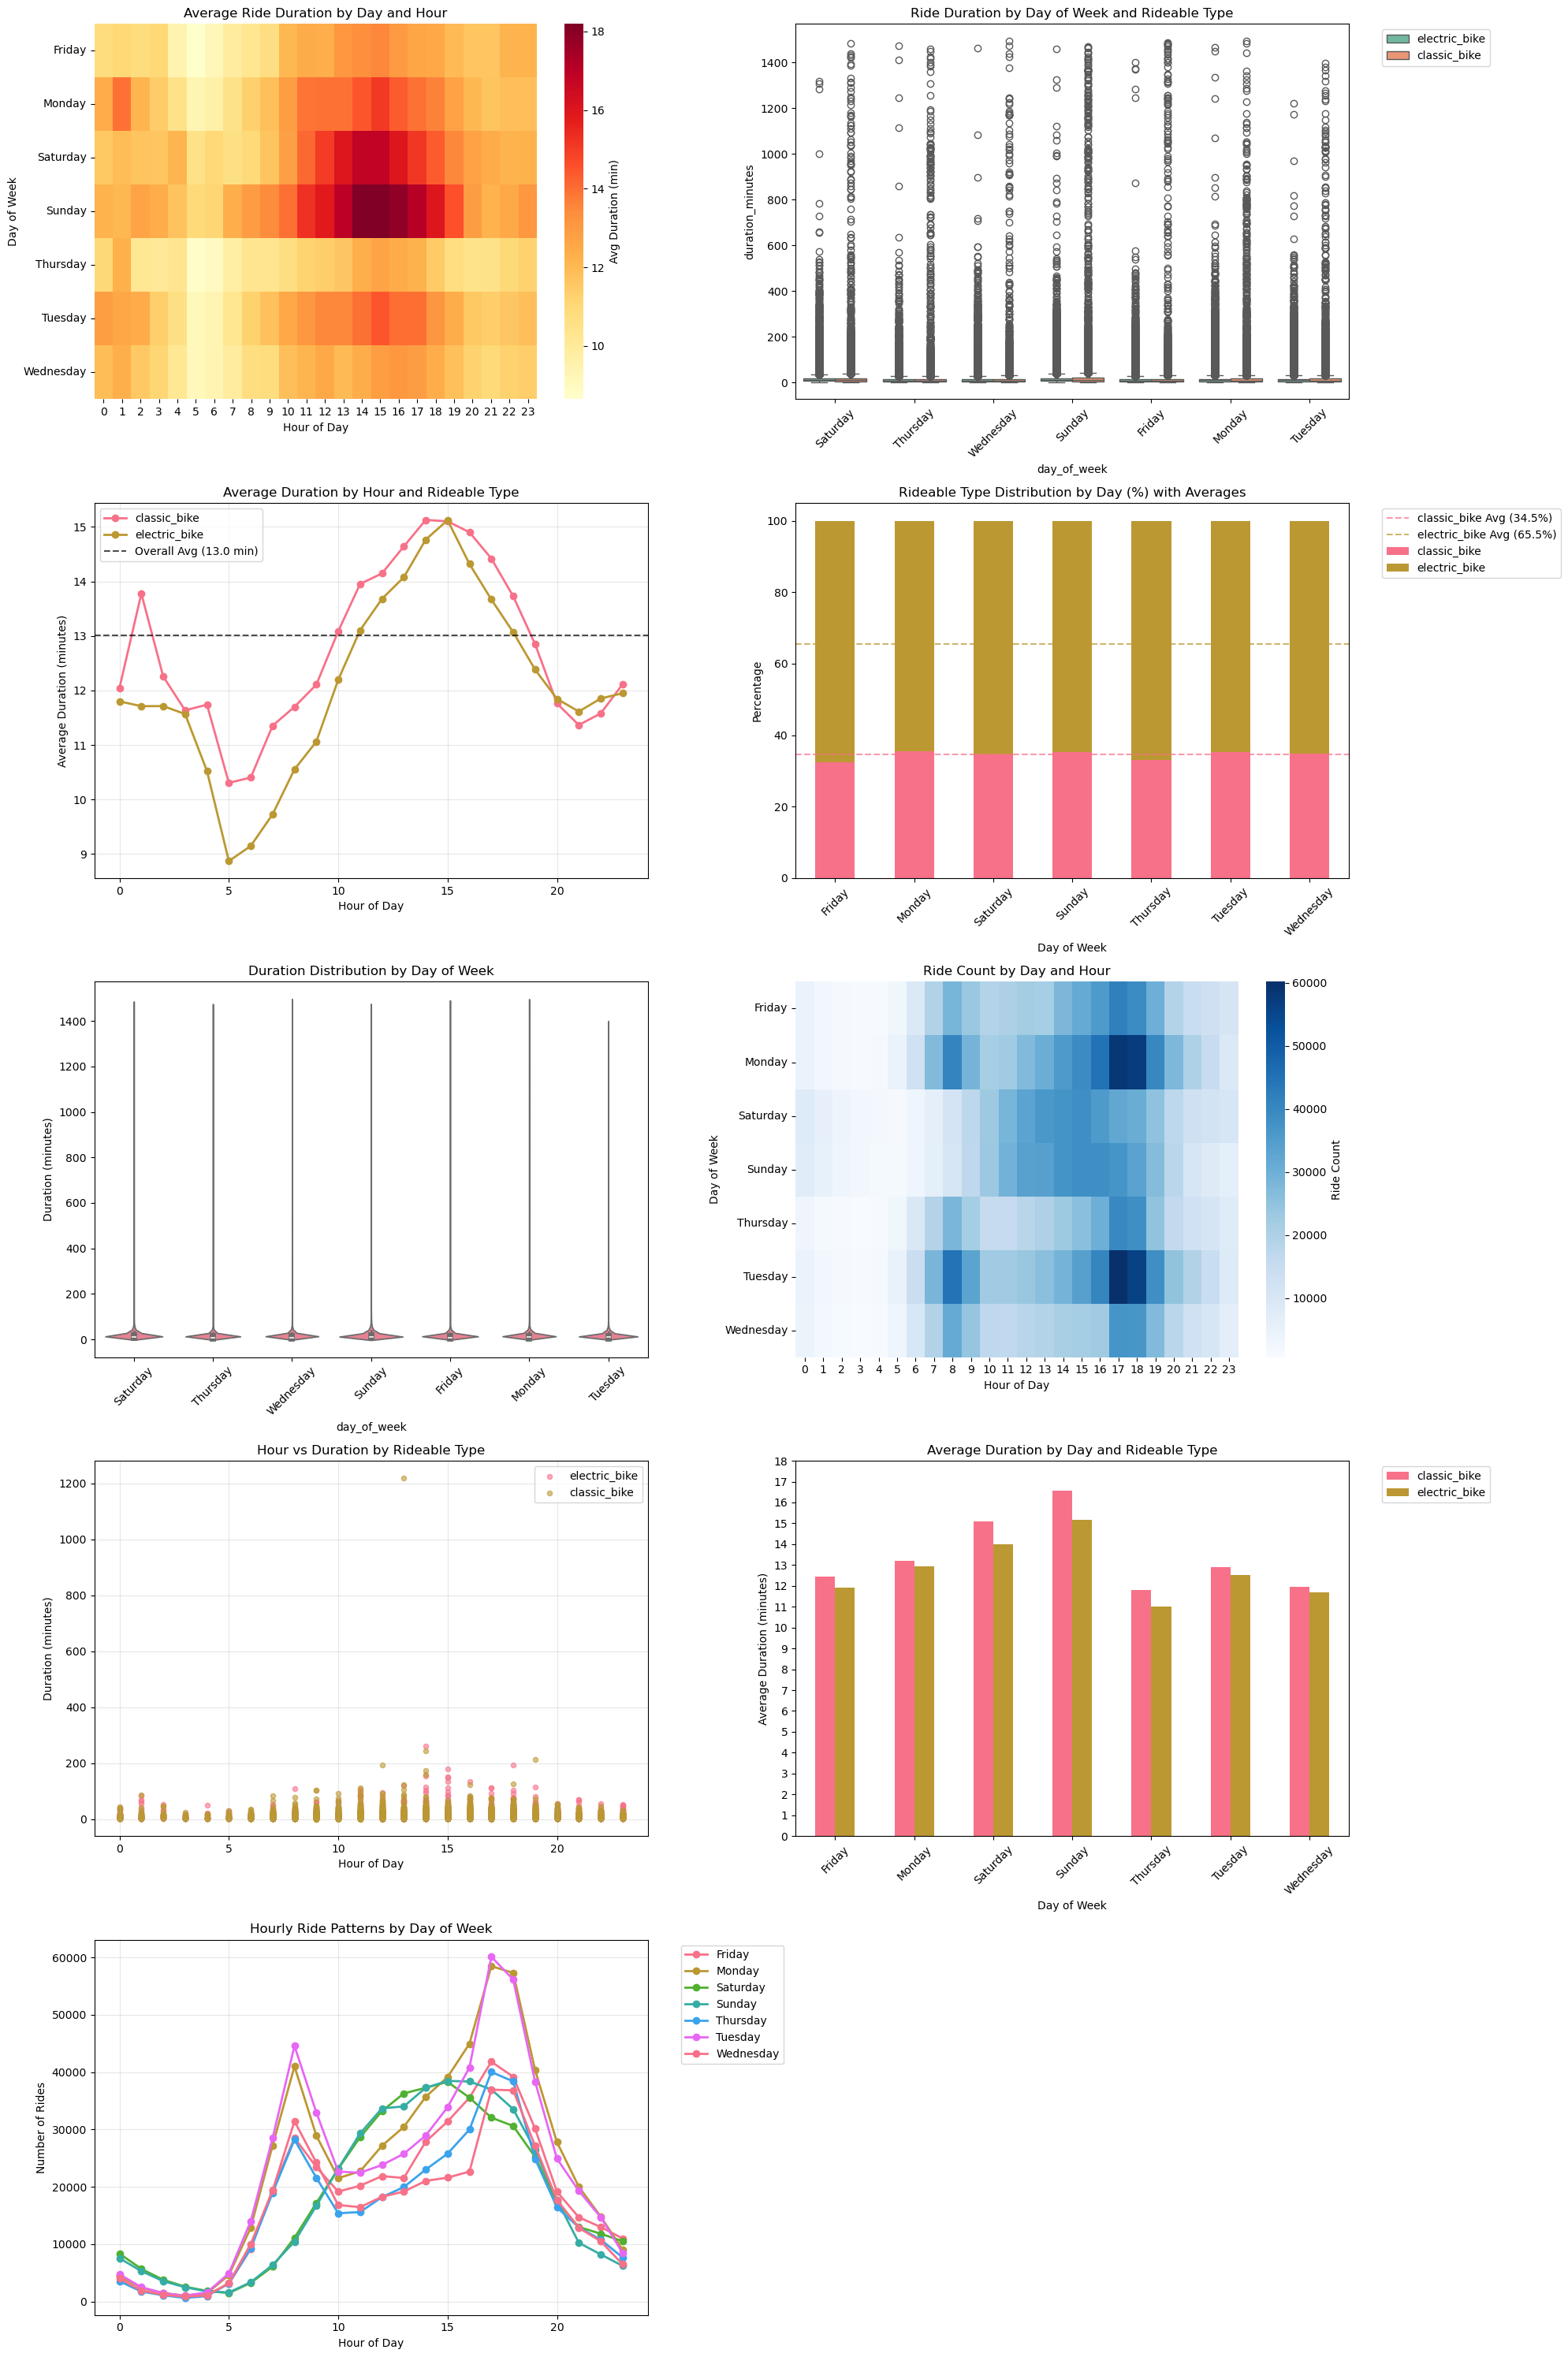

In [45]:
print('''
TO DO:
- remove outliers for "ride duration by DOW and rideable type" to improve clarity
- remove outliers for "duration by DOW" to improve clarity
- evaluate what's happening with outliers 
    - hypothesize around the outliers & proof 
- ride duration by start/end position
- ride duration + DOW by start/end position
- look at 'duration by day and hour' and 'count by day and hour' -- interrogate
- curiosity: I expect ride duration for ebikes to be shorter because they can go faster. 
    - Is this true? 
    - Is there a different pattern of behavior? 
''')

# run function
create_relationship_visualizations(df)

In [46]:
def perform_advanced_analysis(df):
    """
    Perform advanced statistical analysis
    """
    print("\n=== ADVANCED STATISTICAL ANALYSIS ===")
    
    # 1. ANOVA: Test if mean duration differs significantly across days
    day_groups = [group['duration_minutes'].values for name, group in df.groupby('day_of_week')]
    f_stat_day, p_val_day = stats.f_oneway(*day_groups)
    print(f"\nANOVA - Duration by Day of Week:")
    print(f"F-statistic: {f_stat_day:.4f}")
    print(f"P-value: {p_val_day:.4f}")
    print(f"Result: {'Significant difference' if p_val_day < 0.05 else 'No significant difference'}")
    
    # 2. ANOVA: Test if mean duration differs significantly across rideable types
    rideable_groups = [group['duration_minutes'].values for name, group in df.groupby('rideable_type')]
    f_stat_rideable, p_val_rideable = stats.f_oneway(*rideable_groups)
    print(f"\nANOVA - Duration by Rideable Type:")
    print(f"F-statistic: {f_stat_rideable:.4f}")
    print(f"P-value: {p_val_rideable:.4f}")
    print(f"Result: {'Significant difference' if p_val_rideable < 0.05 else 'No significant difference'}")
    
    # 3. Correlation between hour and duration
    hour_duration_corr, hour_duration_p = stats.pearsonr(df['hour'], df['duration_minutes'])
    print(f"\nCorrelation - Hour vs Duration:")
    print(f"Correlation coefficient: {hour_duration_corr:.4f}")
    print(f"P-value: {hour_duration_p:.4f}")
    print(f"Result: {'Significant correlation' if hour_duration_p < 0.05 else 'No significant correlation'}")
    
    # 4. Summary statistics by groups
    print("\n=== GROUP SUMMARY STATISTICS ===")
    print("\nAverage Duration by Day of Week:")
    day_summary = df.groupby('day_of_week')['duration_minutes'].agg(['mean', 'std', 'count'])
    print(day_summary.round(2))
    
    print("\nAverage Duration by Rideable Type:")
    rideable_summary = df.groupby('rideable_type')['duration_minutes'].agg(['mean', 'std', 'count'])
    print(rideable_summary.round(2))
    
    print("\nPeak Hours by Day of Week (mode of hour):")
    peak_hours = df.groupby('day_of_week')['hour'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')
    print(peak_hours)


In [47]:
print('''
TO DO:
-  outlier evaluation
''')

# run function
perform_advanced_analysis(df)


=== ADVANCED STATISTICAL ANALYSIS ===

ANOVA - Duration by Day of Week:
F-statistic: 2379.3788
P-value: 0.0000
Result: Significant difference

ANOVA - Duration by Rideable Type:
F-statistic: 792.7277
P-value: 0.0000
Result: Significant difference

Correlation - Hour vs Duration:
Correlation coefficient: 0.0244
P-value: 0.0000
Result: Significant correlation

=== GROUP SUMMARY STATISTICS ===

Average Duration by Day of Week:
              mean    std   count
day_of_week                      
Friday       12.08  20.40  440700
Monday       13.04  19.94  574877
Saturday     14.38  20.76  434246
Sunday       15.67  27.23  432738
Thursday     11.26  19.55  388157
Tuesday      12.66  17.93  556583
Wednesday    11.78  18.07  381759

Average Duration by Rideable Type:
                mean    std    count
rideable_type                       
classic_bike   13.46  27.89  1108483
electric_bike  12.78  15.67  2100577

Peak Hours by Day of Week (mode of hour):
day_of_week
Friday       17
Monday    

In [ ]:
def create_interaction_analysis(df):
    """
    Create visualizations specifically focused on variable interactions
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 3D-like visualization using bubble plot
    ax1 = axes[0, 0]
    # Group data for bubble sizes
    bubble_data = df.groupby(['day_of_week', 'hour']).agg({
        'duration_minutes': 'mean',
        'ride_id': 'count'
    }).reset_index()
    
    scatter = ax1.scatter(bubble_data['day_of_week'], bubble_data['hour'], 
                         c=bubble_data['duration_minutes'], s=bubble_data['ride_id']/10,
                         alpha=0.6, cmap='viridis')
    ax1.set_xlabel('Day of Week')
    ax1.set_ylabel('Hour')
    ax1.set_title('Day vs Hour (Color=Avg Duration, Size=Ride Count)')
    plt.colorbar(scatter, ax=ax1, label='Avg Duration (min)')
    
    # 2. Rideable type patterns by hour
    ax2 = axes[0, 1]
    rideable_hour = df.groupby(['hour', 'rideable_type']).size().unstack(fill_value=0)
    rideable_hour_pct = rideable_hour.div(rideable_hour.sum(axis=1), axis=0) * 100
    
    for col in rideable_hour_pct.columns:
        ax2.plot(rideable_hour_pct.index, rideable_hour_pct[col], 
                marker='o', label=col, linewidth=2)
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Percentage of Rides')
    ax2.set_title('Rideable Type Distribution by Hour')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Duration patterns matrix
    ax3 = axes[1, 0]
    duration_matrix = df.groupby(['day_of_week', 'rideable_type'])['duration_minutes'].mean().unstack()
    sns.heatmap(duration_matrix, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=ax3)
    ax3.set_title('Average Duration: Day vs Rideable Type')
    
    # 4. Peak usage analysis
    ax4 = axes[1, 1]
    peak_usage = df.groupby(['day_of_week', 'hour']).size().unstack()
    peak_usage_norm = peak_usage.div(peak_usage.sum(axis=1), axis=0) * 100
    
    im = ax4.imshow(peak_usage_norm.values, cmap='YlOrRd', aspect='auto')
    ax4.set_xticks(range(len(peak_usage_norm.columns)))
    ax4.set_xticklabels(peak_usage_norm.columns)
    ax4.set_yticks(range(len(peak_usage_norm.index)))
    ax4.set_yticklabels(peak_usage_norm.index)
    ax4.set_xlabel('Hour of Day')
    ax4.set_ylabel('Day of Week')
    ax4.set_title('Usage Intensity Heatmap (%)')
    plt.colorbar(im, ax=ax4)
    
    plt.tight_layout()
    plt.show()

# USAGE EXAMPLE:
# analyze_bike_relationships(df)
# create_interaction_analysis(df)

In [8]:
print("""
USAGE INSTRUCTIONS:

1. Load your dataframe (replace 'df' with your actual dataframe name)
2. Run the main analysis: analyze_bike_relationships(your_df)
3. For additional interaction visualizations: create_interaction_analysis(your_df)

KEY INSIGHTS TO LOOK FOR:

• Temporal patterns - Do certain rideable types peak at different hours/days?
• Duration differences - Are there systematic differences in ride length?
• Usage intensity - Which combinations of day/hour show highest activity?
• Interaction effects - Do the relationships change when considering multiple variables together?

The analysis provides both statistical tests and rich visualizations to understand
the complex relationships between your variables.
""")


USAGE INSTRUCTIONS:

1. Load your dataframe (replace 'df' with your actual dataframe name)
2. Run the main analysis: analyze_bike_relationships(your_df)
3. For additional interaction visualizations: create_interaction_analysis(your_df)

KEY INSIGHTS TO LOOK FOR:

• Temporal patterns - Do certain rideable types peak at different hours/days?
• Duration differences - Are there systematic differences in ride length?
• Usage intensity - Which combinations of day/hour show highest activity?
• Interaction effects - Do the relationships change when considering multiple variables together?

The analysis provides both statistical tests and rich visualizations to understand
the complex relationships between your variables.

